# Title Word Count

After screening out papers considering only their titles, aproximatelly 1200 articles remained from initial 4500 documents group, which is composed of results from of the same query string in the following research databases:
- Scopus
- Google Scholar *(up to the page 40 ~ 400 papers)*
- Web of Science
- Compendex

The objective now is to analyze the screened articles to understand how those 1200 articles could be organized.


## 1. Collect Data



In [2]:
import pandas as pd

SHEET_ID = '1fsWp0WG-Ge3faq_Quaqh9grixuoc5hNwRwYeVT39PUY'
SHEET_NAMES = ['Rodrigo','Pietro','Fentanes']

sheets = []
for sheet in SHEET_NAMES:
    url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={sheet}'
    sheets.append(pd.read_csv(url))
df = pd.concat(sheets)

In [11]:
df.head()

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body,Unnamed: 88
0,VRLH5VY9,conferencePaper,1997.0,"Dinovitzer, A; Rene, JL; Silberhorn, R; Steele, M",The mooring selection guide (MSG) software,"OCEANS `97 MTS/IEEE CONFERENCE PROCEEDINGS, VO...",0-7803-4108-2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FMHNKV2H,conferencePaper,1997.0,"Francois, M; Pereira, MA; Raposo, C",Classification of fibre rope moorings for floa...,OFFSHORE ENGINEERING,1-85312-537-7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U7ND9YL8,conferencePaper,1998.0,"Huang, Ken; Lee, Ming Yao",Experiences in classification of deepwater moo...,Offshore Technology Conference,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3CCNNKNJ,conferencePaper,1998.0,"Jannasch, H; Sakamoto, C; Chapin, T; Johnson, ...",In situ analyzers and samplers for long-term o...,OCEAN COMMUNITY CONFERENCE'98: CELEBRATING 199...,0-933957-21-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SFLANYBX,conferencePaper,1998.0,"Shin, Y; Lee, C; Jones, DE","Integrated motion, load and structural analysi...",PRACTICAL DESIGN OF SHIPS AND MOBILE UNITS,0-444-82918-0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Word Cloud

Creating a World Cloud with titles from selected articles.

Reference: https://thinkingneuron.com/how-to-create-a-bigram-trigram-wordcloud-in-python/

In [17]:
titles = df[df['first_round (title)'] == 'IN']['Title'].values

In [18]:
!pip install textblob wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.3/772.3 kB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 kB 2.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [19]:
from textblob import TextBlob

In [25]:
full_text = ' '.join(titles.astype(str).tolist())

In [31]:
# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(full_text)

In [36]:
import nltk
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/user01/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

In [39]:
# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))

In [42]:
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

##### Important word combinations ####
msg classification fibre_rope_moorings production_units experiences integrated structural_analysis offshore_structures anchor condition fpso_integrity structural_monitoring glas_dowr_mooring system_design_considerations fpsos_fpso jip fpso fatigue_loads_open_ocean_aquaculture_engineering communications mbari 's_ocean integrated fpso marine_systems anchor instrumentation open_ocean_aquaculture reliability_methods deepwater_position-mooring analysis_reliability fpso/fso direct large_strains synthetic_fiber polymeric_optical_fibers new_generation deployment_open_ocean_aquaculture_engineering fish system_dynamics numerical_models field_measurements_design oil_storage_vessels risk-based inspection_planning mooring wave_energy_converters design_issues magnetic nondestructive_evaluation wire_ropes prediction green_sea_loads fpso random_seas floating jip-key integrity_management review production_platforms deep_waters mexico_safety fpso approximate_reason

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [45]:
# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['less','Trump','American','politics','country']
 
wordcloudimage = WordCloud( 
    max_words=50,
    font_step=2 ,
    max_font_size=500,
    stopwords=customStopwords,
    background_color='black',
    width=1000,
    height=720
).generate(NewNounString)

[11/11/22 11:40:25] WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=848295;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=54281;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=163714;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=709611;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=865383;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=933993;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :520: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               Image.ROTATE_90)                                                                    
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=624010;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=112993;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=263407;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=900340;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=385415;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=421599;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=646924;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=189376;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=521932;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=907659;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=539121;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=594826;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=149588;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=535552;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=922970;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=745619;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=17407;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=96038;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=892549;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=447478;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=493367;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=811456;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=765257;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=558872;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=665036;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=473039;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=844688;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=446111;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=961752;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=693762;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=977426;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=983200;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=166953;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=879180;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=560225;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=578328;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=847566;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=858181;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=257218;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=578761;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=931148;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=263352;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=668991;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=49925;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=182547;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=605871;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=996225;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=349158;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=438828;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=390658;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=101549;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=2602;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=560466;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=850031;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=714368;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=738037;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=169668;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=247019;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=890534;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=945885;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=888306;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=236655;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=343571;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=413252;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=980135;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=344586;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=922057;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=678987;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=401933;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=797407;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=153970;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=162201;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=10302;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=15492;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=809354;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=370167;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=643074;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=608562;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=889595;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=641543;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=587407;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=620034;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=855477;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=582725;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=465095;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=672659;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=288074;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=374739;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=559203;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=25775;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=115317;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=397836;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=434082;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=43053;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=214430;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=851966;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=46477;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=755517;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=577051;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=487065;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=276646;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=912522;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=869717;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=828297;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=656927;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=713759;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=965129;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=887489;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=369427;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=566314;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=58959;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=293371;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=274331;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=756250;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=352250;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=567787;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=952895;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=931840;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=10216;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=174279;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=532221;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=442800;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=947222;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=138920;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=866307;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=751174;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=843518;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=444489;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=986134;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=507093;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

[11/11/22 11:40:26] WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=635408;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=554969;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=142482;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=170408;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=230115;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=590503;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=820297;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=6647;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=922371;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=726483;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=947914;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=251278;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=754743;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=521183;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=35003;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=227374;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=801428;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=187900;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=61245;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=119363;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=596778;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=47993;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=271849;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=629430;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=365126;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=793330;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=768941;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=64057;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=460754;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=955588;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=241482;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=679556;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=753981;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=436062;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=73346;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=938797;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=77801;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=51032;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=400126;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=485281;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=994879;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=507795;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=300052;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=228464;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=251927;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=329025;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=362546;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=669452;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=901520;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=274815;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=230061;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=346421;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=257221;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=269102;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=928706;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=543976;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=751703;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=996609;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=126449;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=723522;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=365761;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=844853;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=221801;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=20088;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=50312;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=17106;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=884847;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=156242;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=562610;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=531246;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=752870;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=298326;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=149297;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=9302;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=264870;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=580679;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=471781;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=880795;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=317753;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=677168;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=606116;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=158720;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=953464;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=471816;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=960244;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=783011;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=530563;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=503817;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=421451;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=740971;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=23101;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=205148;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=255237;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=235852;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=232390;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=545505;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=266863;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=852100;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=729738;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=464877;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=475713;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=265477;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=598772;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=564489;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=825100;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=829872;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=889858;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=787879;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=889412;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=19666;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=589399;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=56243;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=455715;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=235099;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=649138;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=122331;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=239269;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=668615;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=913070;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=447025;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=64392;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=696375;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=450763;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=858544;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=532487;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=646960;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

[11/11/22 11:40:27] WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=461863;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=137569;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=7733;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=351342;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=224647;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=15836;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=405669;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=366019;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=654803;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=440011;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=522470;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=174298;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=736942;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=930934;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=799547;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=43835;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=632068;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=614125;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=93041;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=336753;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=973382;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=959280;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=826823;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=332835;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=485708;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=518716;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=441079;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=286433;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=9017;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=48655;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=908248;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=636726;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=84970;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=361474;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=756527;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=746290;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=789225;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=832808;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=445352;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=166561;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=626591;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=683528;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=673833;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=235188;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=595637;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=18032;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=798644;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=908488;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=473747;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=226556;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=270400;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=244096;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=476166;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=531980;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=227954;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=110898;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=642832;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=974178;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=773473;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=955667;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=953364;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=191102;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=388294;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=485025;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=860339;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=706542;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=29791;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=667377;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=448039;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=637380;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=241531;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=604512;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=917376;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=61935;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=628270;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=881807;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=869631;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=298514;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=768838;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=819659;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=535260;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=340164;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=784508;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=310317;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=884224;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=24448;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=292381;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=303207;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=592695;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=801156;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=741649;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=364895;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=85995;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=158193;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=304491;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=73033;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=881830;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=950266;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=695940;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=458199;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=50192;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=240562;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=176279;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=583890;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=869703;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=42264;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=773720;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=235011;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=483314;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=560086;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=232200;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=300690;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=2136;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=725533;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=588302;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=92434;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

[11/11/22 11:40:28] WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=391594;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=45545;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=804358;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=286265;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=939471;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=481430;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=300944;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=452702;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=26714;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=980310;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=830871;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=719373;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=246878;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=956990;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=624581;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=236860;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=362328;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=335493;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=89409;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=59633;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=941958;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=779635;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=716166;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=408459;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=428522;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=362347;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=99943;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=999601;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=462081;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=179450;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=65292;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=865165;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=620052;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=333868;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=510481;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=775011;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=30603;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=721755;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=18834;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=614987;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=362099;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=879319;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=149502;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=582417;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=428199;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=760342;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=623573;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=618950;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=810494;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=280949;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=289668;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=138172;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=458742;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=406230;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=392572;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=765142;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=832239;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=754712;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=160938;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=138429;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=905714;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=184999;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=71638;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=168532;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=131379;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=156790;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=523618;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=91327;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=553092;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=815946;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=111346;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=480916;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=55853;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=264762;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=445414;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=555141;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=441714;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=925886;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=264107;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=63562;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=572122;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=390429;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=299208;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=224401;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=432333;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=889894;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=449768;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=934194;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=533434;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=635800;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=743646;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=225566;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=922416;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=233133;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=603151;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=31024;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=203374;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=243225;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

[11/11/22 11:40:29] WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=288422;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=588118;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=962235;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=589745;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=437376;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=588244;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=767782;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=949535;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=410277;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=629124;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=131824;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=607907;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=755773;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=171;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=587577;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=770231;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=853527;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=443454;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=581745;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=118979;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=470167;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=726214;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=879553;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=436757;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=70883;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=236337;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=454921;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=846235;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=645389;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=477350;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=678579;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=154178;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=120690;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=817752;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=793276;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=929700;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=194367;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=328293;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=372089;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=686688;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=673109;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=348701;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=760384;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=197480;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=324721;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=475115;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=864898;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=636805;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=968877;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=749236;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=432690;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=811970;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=329335;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=434354;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=718730;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=723908;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=826022;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=259996;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=723089;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=259481;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=502197;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=922694;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=500051;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=775824;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=360392;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=438480;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=829289;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=673836;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=905097;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=576164;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=367772;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=799599;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=995629;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=456155;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=325687;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=92099;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=324836;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=893729;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=428200;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=316326;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=147541;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=180312;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=271208;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=431308;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=13639;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=550049;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  /home/user01/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py ]8;id=357645;file:///usr/local/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=367797;file:///usr/local/lib/python3.8/warnings.py#109\109]8;;\
                             :508: DeprecationWarning: textsize is deprecated and will be removed                  
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

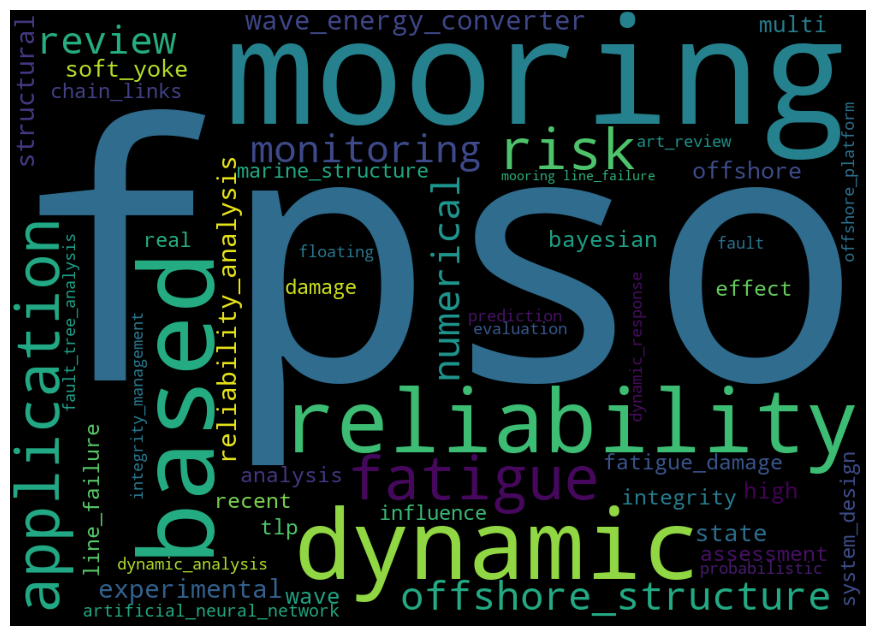

In [46]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()